In [13]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from keras.preprocessing import text, sequence
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import pandas as pd
import keras

In [2]:
df = pd.read_csv('cleaned.csv')

In [3]:
df = df.sample(frac=1)

In [148]:
df.head()

,keywords,label
69,marlex repair inguinal region external obl...,urology
848,bile peritonitis bowel perforation pneumot...,gastroenterology
265,low back syndrome low back pain facet inje...,radiology
647,spondylosis neck pain headaches decompres...,orthopedic
958,extrahepatic ductal dilatation gallbladder ...,gastroenterology


In [17]:
X = df.keywords.values
y = df.label.values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [19]:
tokenize = text.Tokenizer(num_words=3035, char_level=False)
tokenize.fit_on_texts(X_train)

In [20]:
len(tokenize.word_index)

3108

In [21]:
X_train = tokenize.texts_to_matrix(X_train)
X_test = tokenize.texts_to_matrix(X_test)

In [22]:
len(X_train[0])

3035

In [23]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [24]:
encoder.inverse_transform([0,1,2,3,4])

array(['gastroenterology', 'neurology', 'orthopedic', 'radiology',
       'urology'], dtype=object)

In [25]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [26]:
y_pred = clf.predict(X_test)

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7414634146341463


In [28]:
print(classification_report(y_test, y_pred))
dec= classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        33
           1       1.00      0.97      0.99        37
           2       0.70      0.77      0.73        52
           3       0.56      0.54      0.55        46
           4       0.81      0.78      0.79        37

    accuracy                           0.74       205
   macro avg       0.75      0.75      0.75       205
weighted avg       0.74      0.74      0.74       205



In [29]:
confusion_matrix(y_test, y_pred)

array([[22,  0,  1,  7,  3],
       [ 0, 36,  1,  0,  0],
       [ 2,  0, 40, 10,  0],
       [ 5,  0, 12, 25,  4],
       [ 2,  0,  3,  3, 29]], dtype=int64)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clfRF = RandomForestClassifier(random_state=0)
clfRF.fit(X_train, y_train)

C:\Users\shibly\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [31]:
y_predRF = clfRF.predict(X_test)

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predRF))

Accuracy: 0.7121951219512195


In [33]:
x = classification_report(y_test, y_predRF)

In [34]:
print(x)

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        33
           1       0.77      0.73      0.75        37
           2       0.72      0.75      0.74        52
           3       0.48      0.50      0.49        46
           4       0.84      0.84      0.84        37

    accuracy                           0.71       205
   macro avg       0.73      0.72      0.73       205
weighted avg       0.72      0.71      0.71       205



In [35]:
confusion_matrix(y_test, y_predRF)

array([[26,  0,  0,  6,  1],
       [ 0, 27,  5,  5,  0],
       [ 0,  1, 39, 11,  1],
       [ 3,  7,  9, 23,  4],
       [ 2,  0,  1,  3, 31]], dtype=int64)

In [36]:
from sklearn.naive_bayes import MultinomialNB
clfNB = MultinomialNB()
clfNB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
y_predNB = clfNB.predict(X_test)

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predNB))

Accuracy: 0.7024390243902439


In [39]:
print(classification_report(y_test, y_predNB))
d = classification_report(y_test, y_predNB)

              precision    recall  f1-score   support

           0       0.96      0.70      0.81        33
           1       0.62      0.57      0.59        37
           2       0.79      0.81      0.80        52
           3       0.46      0.48      0.47        46
           4       0.78      0.97      0.87        37

    accuracy                           0.70       205
   macro avg       0.72      0.70      0.71       205
weighted avg       0.71      0.70      0.70       205



In [40]:
confusion_matrix(y_test, y_predNB)

array([[23,  0,  0,  7,  3],
       [ 0, 21,  3, 11,  2],
       [ 0,  2, 42,  7,  1],
       [ 1, 11,  8, 22,  4],
       [ 0,  0,  0,  1, 36]], dtype=int64)

In [42]:
#saving best baseline model
import joblib
joblib.dump(clf, 'DTBestBaseline.sav')

['DTBestBaseline.sav']

In [44]:
#load and predict with a saved model
predictor = joblib.load('DTBestBaseline.sav')

In [139]:
y_predict = predictor.predict(X_test)

In [140]:
y_predict

array([1, 2, 0, 4, 1, 1, 0, 0, 0, 2, 4, 4, 1, 2, 3, 3, 2, 4, 3, 2, 2, 3,
       1, 2, 0, 4, 3, 4, 1, 4, 1, 2, 1, 1, 4, 1, 2, 0, 3, 2, 1, 0, 2, 4,
       4, 3, 3, 2, 0, 1, 2, 4, 2, 3, 3, 1, 2, 2, 2, 2, 3, 0, 1, 0, 2, 0,
       0, 1, 0, 4, 2, 4, 4, 3, 2, 2, 3, 2, 1, 0, 4, 1, 3, 1, 2, 0, 3, 2,
       0, 4, 2, 1, 3, 4, 3, 0, 4, 0, 2, 1, 0, 2, 2, 2, 3, 3, 4, 0, 4, 0,
       3, 3, 0, 1, 3, 2, 3, 4, 2, 1, 2, 3, 3, 1, 4, 1, 1, 1, 0, 3, 3, 3,
       2, 2, 3, 1, 1, 2, 3, 2, 2, 0, 1, 1, 2, 4, 2, 1, 0, 0, 0, 3, 3, 4,
       4, 3, 2, 1, 4, 3, 2, 2, 0, 0, 4, 4, 2, 4, 2, 2, 3, 0, 3, 2, 2, 3,
       1, 2, 3, 2, 3, 2, 4, 4, 1, 4, 3, 4, 2, 1, 4, 3, 2, 1, 2, 2, 4, 0,
       3, 2, 3, 3, 4, 2, 3])

In [141]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        31
           1       0.97      1.00      0.99        36
           2       0.77      0.70      0.73        57
           3       0.54      0.56      0.55        45
           4       0.78      0.81      0.79        36

    accuracy                           0.74       205
   macro avg       0.75      0.75      0.75       205
weighted avg       0.74      0.74      0.74       205



In [142]:
from io import StringIO 
sample1 = StringIO("""keywords;
                    pyeloplasty, ureteral stent placement, nephrolithotomy, ureteropelvic junction obstruction, jackson-pratt drain, foley catheter, renal pelvis, kidney stones, monocryl sutures, pelvis, renal, ureteropelvic, sutures;
                    fascial defect, umbilical hernia repair, curvilinear umbilical, hernia sac, metzenbaum scissors, umbilical hernia, bovie electrocautery, electrocautery, hernia, incision, umbilical;
                    origin of stalk, extensor retinaculum, wrist ganglion, incision, excision, dorsal, tourniquet, wrist, ganglion;
                    chronic venous hypertension, varicosities, stab phlebectomies, greater saphenous vein stripping, lower extremities, vein stripping, saphenous vein, vein, incisions, hemostasis, stripping, branches, phlebectomies
                    """)

    #keywords labeled as 
    #1. urology(labeled as 4) 
    #2. gasternology(labeled as 0) 
    #3. orthopedic(labeled as 2)
    #4. neurology (labeled as 1)
    #first we need to preprocess the example. Store the input texts to a dataframe and preprocess

predictDF = pd.read_csv(sample1, sep =";")


predictDF

,keywords,Unnamed: 1
0,"pyeloplasty, ureteral sten...",NaN
1,"fascial defect, umbilical ...",NaN
2,"origin of stalk, extensor ...",NaN
3,chronic venous hypertensio...,NaN


In [143]:
import re
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
SPACE_RE = re.compile(' ')
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    #text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = SPACE_RE.sub(' ', text)
    #text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

predictDF['keywords'] = predictDF['keywords'].apply(clean_text)
predictDF

,keywords,Unnamed: 1
0,pyeloplasty ureteral sten...,NaN
1,fascial defect umbilical ...,NaN
2,origin of stalk extensor ...,NaN
3,chronic venous hypertensio...,NaN


In [144]:
X_sample1 = tokenize.texts_to_matrix(predictDF.keywords)

In [145]:
X_sample1

array([[0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [146]:
y_sample1 = predictor.predict(X_sample1)
y_sample1

array([4, 0, 2, 2])

In [147]:
#first 3 prediction was right. model missclassified the last one

In [233]:
label = ['Gastroenterology', 'Neurology', 'Orthopedic', 'Radiology',
       'Urology', 'Gastroenterology', 'Neurology', 'Orthopedic', 'Radiology',
       'Urology', 'Gastroenterology', 'Neurology', 'Orthopedic', 'Radiology',
       'Urology',]

In [222]:
label

['Gastroenterology',
 'Neurology',
 'Orthopedic',
 'Radiology',
 'Urology',
 'Gastroenterology',
 'Neurology',
 'Orthopedic',
 'Radiology',
 'Urology']

In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        42
           1       1.00      0.96      0.98        26
           2       0.67      0.81      0.73        58
           3       0.65      0.57      0.61        54
           4       0.80      0.80      0.80        25

    accuracy                           0.76       205
   macro avg       0.80      0.78      0.79       205
weighted avg       0.76      0.76      0.76       205



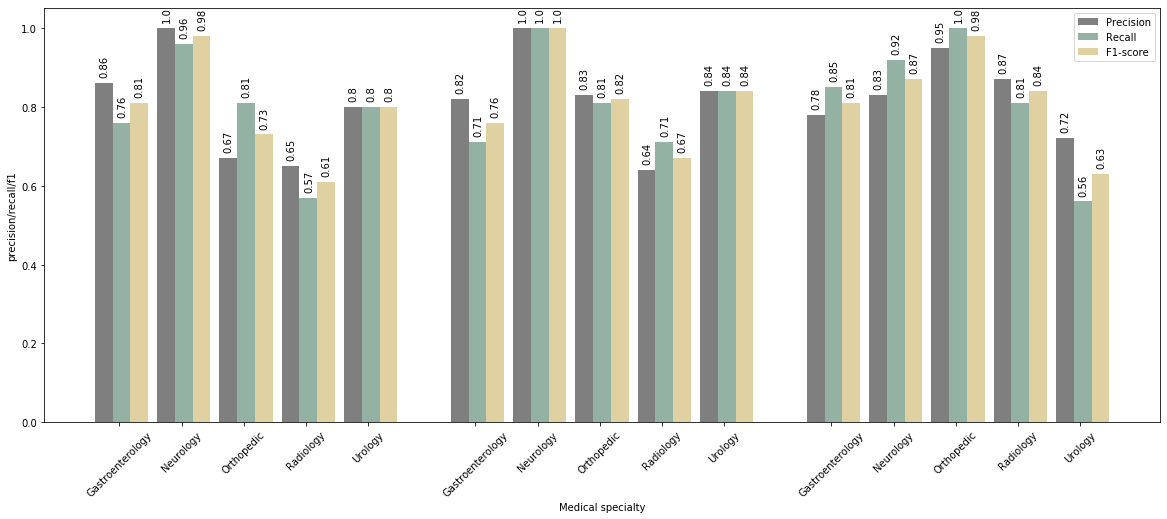

In [251]:
import matplotlib.pyplot as plt
 
# Create bars
barWidth = 2
bars1 = [0.86, 1.00, 0.67, 0.65, 0.80, 0.82, 1.00, 0.83, 0.64, 0.84, 0.78, 0.83, 0.95, 0.87, 0.72 ]
bars2 = [0.76, 0.96, 0.81, 0.57 ,0.80, 0.71, 1.00, 0.81, 0.71, 0.84 , 0.85, 0.92, 1.00, 0.81, 0.56]
bars3 = [0.81 , 0.98, 0.73, 0.61, 0.80, 0.76, 1.00, 0.82, 0.67, 0.84, 0.81, 0.87, 0.98, 0.84, 0.63]
bars4 = bars1 + bars2 + bars3
 
# The X position of bars
r1 = [1,8,15, 22, 29, 41, 48, 55, 62, 69, 81, 88, 95, 102, 109]
r2 = [3,10,17, 24, 31, 43, 50, 57, 64, 71, 83, 90, 97, 104, 111]
r3 = [5,12,19,26,33, 45, 52, 59, 66, 73, 85, 92, 99, 106, 113]
r4 = r1 + r2 + r3
 
plt.figure(figsize=(20, 5))
# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.0,0.0,0.0,0.5), label='Precision')
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.5,0.4,0.6), label='Recall')
plt.bar(r3, bars3, width = barWidth, color = (0.8,0.7,0.4,0.6), label='F1-score')
# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
plt.legend()
plt.xlabel('Medical specialty', fontsize=10)
plt.ylabel('precision/recall/f1', fontsize=10)
 
# Text below each barplot with a rotation at 90°
#plt.xticks([r + barWidth for r in range(len(r4)/3)], ['DD', 'with himself', 'with DC', 'with Silur', 'DC'], rotation=90)
 
# Create labels
labels = bars4
 
# Text on the top of each barplot
for i in range(len(r4)):
    plt.text(x = r4[i]-0.5 , y = bars4[i]+0.02, s = labels[i], size = 10, rotation = 90)
 
# Adjust the margins
plt.subplots_adjust(bottom=0.25, top = 1.4)
#X = np.arange(15)
plt.xticks([2.75, 9.75, 16.75, 23.75, 30.75, 42.75, 49.75, 56.75, 63.75, 70.75, 82.75, 89.75, 96.75, 103.75, 110.75 ], label, fontsize=10, rotation=45)
# Show graphic
plt.show()

In [149]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        31
           1       0.97      1.00      0.99        36
           2       0.77      0.70      0.73        57
           3       0.54      0.56      0.55        45
           4       0.78      0.81      0.79        36

    accuracy                           0.74       205
   macro avg       0.75      0.75      0.75       205
weighted avg       0.74      0.74      0.74       205



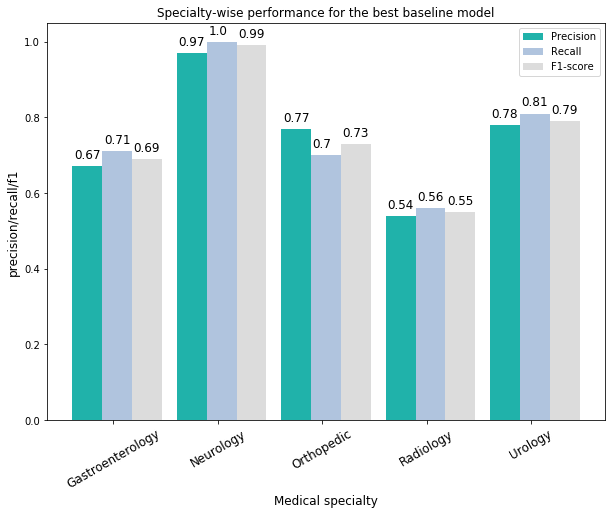

In [237]:
import matplotlib.pyplot as plt
label = ['Gastroenterology', 'Neurology', 'Orthopedic', 'Radiology',
       'Urology']
# Create bars
barWidth = 2
bars1 = [0.67, 0.97, 0.77, 0.54, 0.78]
bars2 = [0.71, 1.0, 0.70, 0.56 ,0.81]
bars3 = [0.69 , 0.99, 0.73, 0.55, 0.79]
bars4 = bars1 + bars2 + bars3
 
# The X position of bars
r1 = [1,8,15, 22, 29]
r2 = [3,10,17, 24, 31]
r3 = [5,12,19,26,33]
r4 = r1 + r2 + r3
 
plt.figure(figsize=(10, 1.2))
# Create barplot
plt.bar(r1, bars1, width = barWidth, color = 'lightseagreen', label='Precision')
plt.bar(r2, bars2, width = barWidth, color = 'lightsteelblue', label='Recall')
plt.bar(r3, bars3, width = barWidth, color = 'gainsboro', label='F1-score')
# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
plt.legend()
plt.xlabel('Medical specialty', fontsize=12)
plt.ylabel('precision/recall/f1', fontsize=12)
 
# Text below each barplot with a rotation at 90°
#plt.xticks([r + barWidth for r in range(len(r4)/3)], ['DD', 'with himself', 'with DC', 'with Silur', 'DC'], rotation=90)
 
# Create labels
labels = bars4
 
# Text on the top of each barplot
for i in range(len(r4)):
    plt.text(x = r4[i]-0.9 , y = bars4[i]+0.02, s = labels[i], size = 12, rotation = 0)
 
# Adjust the margins
plt.subplots_adjust(bottom=1, top = 5.6)
#X = np.arange(15)
plt.title('Specialty-wise performance for the best baseline model')
plt.xticks([2.75, 9.75, 16.75, 23.75, 30.75], label, fontsize=12, rotation=30)
# Show graphic
plt.show()